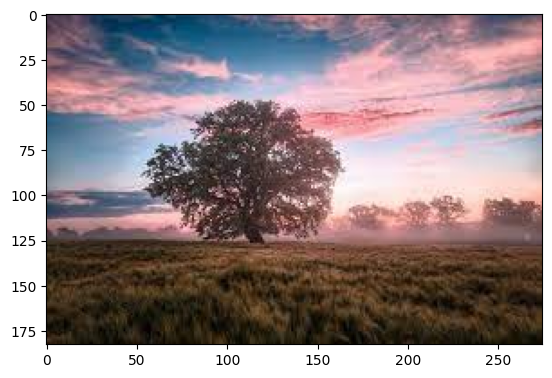

In [116]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
a=Image.open('/home/navabharathi/Downloads/images.jpeg')
plt.figure()
plt.imshow(a)

In [102]:
def dft(x):
    import numpy as np
    import math
    n=len(x)
    dftmatrix=np.ndarray(shape=(n,n),dtype=complex)
    for i in range(n):
        for jj in range(n):
            dftmatrix[i][jj]=np.exp(-2j *math.pi*i*jj/n)
    dft=np.dot(dftmatrix,x)
    return dft
    

(183, 275)


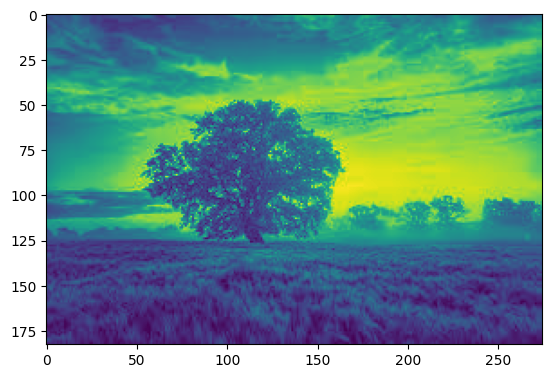

In [128]:
a=a.convert('L')
imagearray=np.array(a)
print(imagearray.shape)
plt.imshow(imagearray)

In [137]:
norows,nocolumns=imagearray.shape
imagearrayfft=np.ndarray(shape=(imagearray.shape),dtype=complex)
imagearrayfft2=np.ndarray(shape=imagearray.shape,dtype=complex)
rowvectors=np.ndarray(shape=(imagearray.shape),dtype=complex)
columnsvecotrs=np.ndarray(dtype=complex,shape=(imagearray.shape))
for i in range(norows):
    rowvectors=imagearray[i,:]
    
    imagearrayfft[i]=dft(rowvectors)
for j in range(nocolumns):
    columnsvecotrs=imagearrayfft[:,j]
    imagearrayfft2[:,j]=dft(columnsvecotrs)

    


In [143]:
sortarray=np.sort(np.abs(imagearrayfft2.reshape(-1)))
#let us take the top 10percent of the data and evaluate
thresholdpercent=0.5
threshold=sortarray[int(np.floor((1-thresholdpercent)*len(sortarray)))]
ind=np.abs(imagearrayfft2)>threshold
comimage=imagearrayfft2*ind



In [144]:
import numpy as np

def invdft(f):
    # Take the size of the input image
    M, N = f.shape
    # Initialize the output array
    g = np.zeros((M, N), dtype=np.complex64)
    # Compute the IDFT along the rows of the input array
    for m in range(M):
        for n in range(N):
            s = 0
            for k in range(N):
                s += f[m, k] * np.exp(1j * 2 * np.pi * n * k / N)
            g[m, n] = s / N
    # Compute the IDFT along the columns of the intermediate result
    for n in range(N):
        for m in range(M):
            s = 0
            for l in range(M):
                s += g[l, n] * np.exp(1j * 2 * np.pi * m * l / M)
            g[m, n] = s / M

    return g.real


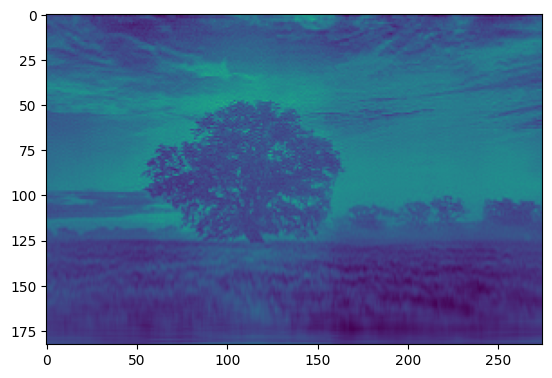

In [145]:
final=invdft(comimage)
plt.imshow(final)